In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize']=15,12

In [58]:
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

In [59]:
df = pd.read_excel("India.csv")
df.head()

,State,Confirmed,Active,Recovered,Deceased,Population
0,Maharashtra,23401,17747,4786,868,112374333
1,Gujarat,8541,5248,2780,513,60439692
2,Tamil Nadu,8002,5898,2051,53,72147030
3,Delhi,7233,5031,2129,73,16787941
4,Rajasthan,3988,1611,2264,113,68548437


In [60]:
df.style.background_gradient(cmap='Reds')

,State,Confirmed,Active,Recovered,Deceased,Population
0,Maharashtra,23401,17747,4786,868,112374333
1,Gujarat,8541,5248,2780,513,60439692
2,Tamil Nadu,8002,5898,2051,53,72147030
3,Delhi,7233,5031,2129,73,16787941
4,Rajasthan,3988,1611,2264,113,68548437
5,Madhya Pradesh,3785,1817,1747,221,72626809
6,Uttar Pradesh,3573,1735,1758,80,199812342
7,West Bengal,2063,1374,499,190,91276115
8,Andhra Pradesh,2018,998,975,45,49577103
9,Punjab,1877,1678,168,31,27743338


In [61]:
df.shape

(37, 6)

In [62]:
df.groupby('State')['Active'].sum().sort_values(ascending=False)

State
Maharashtra               17747
Tamil Nadu                 5898
Gujarat                    5248
Delhi                      5031
Madhya Pradesh             1817
Uttar Pradesh              1735
Punjab                     1678
Rajasthan                  1611
West Bengal                1374
Andhra Pradesh              998
Telengana                   445
Jammu and Kashmir           442
Karnataka                   405
Haryana                     382
Bihar                       364
Odisha                      326
Tripura                     150
Chandigarh                  148
Jharkhand                    79
Assam                        29
Kerala                       26
Ladakh                       21
Uttarakhand                  21
Himachal Pradesh             18
Chhattisgarh                  6
Puducherry                    6
Meghalaya                     2
Dadra and Nagar Haveli        1
Lakshadweep                   0
Manipur                       0
Goa                           0
Da

In [63]:
Total_Confirmed=df.groupby("State")["Confirmed"].sum().sort_values(ascending=False).to_frame()
Total_Confirmed

,Confirmed
State,
Maharashtra,23401
Gujarat,8541
Tamil Nadu,8002
Delhi,7233
Rajasthan,3988
Madhya Pradesh,3785
Uttar Pradesh,3573
West Bengal,2063
Andhra Pradesh,2018


In [64]:
Total_Confirmed.style.background_gradient(cmap='PuBu')

,Confirmed
State,
Maharashtra,23401
Gujarat,8541
Tamil Nadu,8002
Delhi,7233
Rajasthan,3988
Madhya Pradesh,3785
Uttar Pradesh,3573
West Bengal,2063
Andhra Pradesh,2018


# Graphical Represenatation

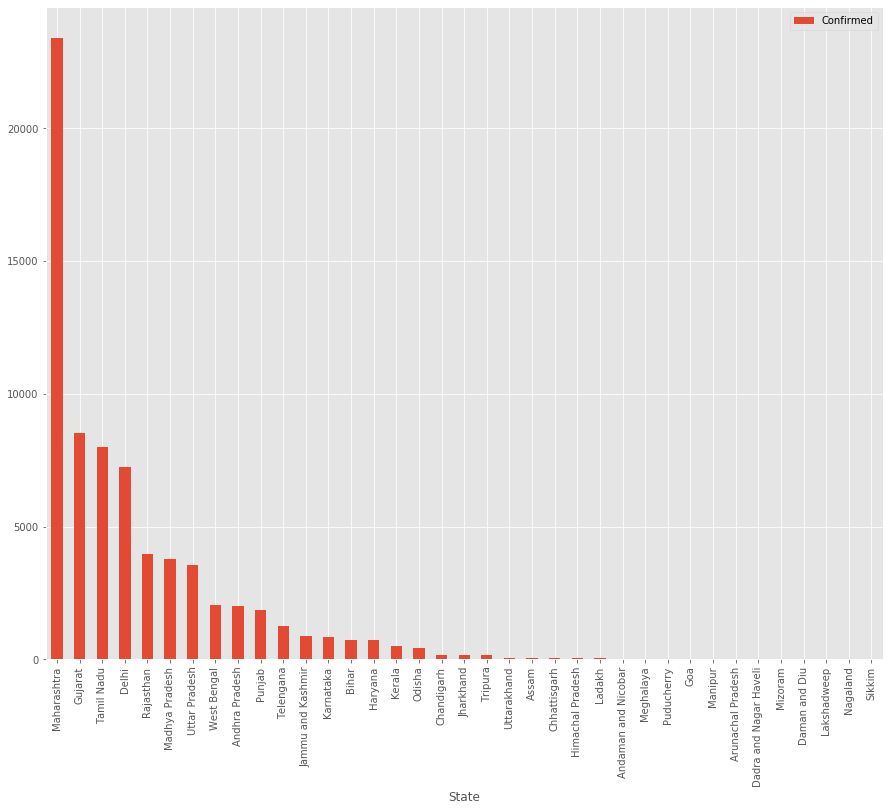

In [65]:
df.plot(kind='bar', x="State",y="Confirmed")

In [66]:
px.bar(df,x="State",y="Confirmed")

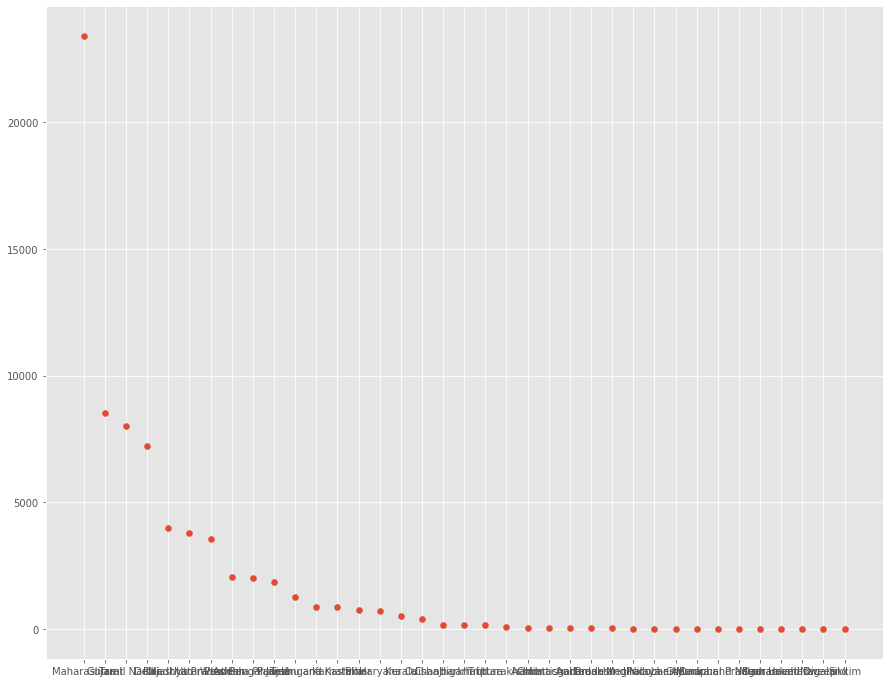

In [67]:
plt.scatter(df['State'], df['Confirmed'])

In [68]:
from plotly.offline import init_notebook_mode, plot, iplot

In [69]:
px.scatter(df,x="State",y="Confirmed")

In [70]:
df2 = pd.read_csv("covid_19_india.csv")
df2.tail(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1900,1901,13-05-2020,8:00 AM,Uttar Pradesh,-,-,1873,82,3664
1901,1902,13-05-2020,8:00 AM,West Bengal,-,-,612,198,2173


In [71]:
fig=px.bar(df2, x="Date", y="Confirmed", color="Confirmed", title="Confirmed Cases in India")
fig.show()

In [72]:
df_world = pd.read_csv("covid_19_data.csv", parse_dates=['Last Update'])
df_world.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0


In [73]:
df_world.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [74]:
fig=px.scatter(df2, x="Date", y="Confirmed", color="Confirmed", title="Confirmed Cases in India")
fig.show()

In [75]:
df_world.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0


In [76]:
df_world.query('Country=="India"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1,0,0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1,0,0
547,548,02-01-2020,NaN,India,2020-01-31 08:15:00,1,0,0
607,608,02-02-2020,NaN,India,2020-02-02 06:03:08,2,0,0
672,673,02-03-2020,NaN,India,2020-02-03 21:43:02,3,0,0
...,...,...,...,...,...,...,...,...
12323,12324,04-06-2020,NaN,India,2020-04-06 09:37:00,4778,136,375
12643,12644,04-07-2020,NaN,India,2020-07-04 23:11:00,5311,150,421
12963,12964,04-08-2020,NaN,India,2020-08-04 22:59:00,5916,178,506
13283,13284,04-09-2020,NaN,India,2020-09-04 23:09:00,6725,226,620


In [88]:
confirm_world = df_world.groupby('Date').sum()['Confirmed'].reset_index()
Death = df_world.groupby('Date').sum()['Deaths'].reset_index()
Recovery = df_world.groupby('Date').sum()['Recovered'].reset_index()

In [89]:
fig=go.Figure()
fig.add_trace(go.scatter(x=confirm_world['Date'], y=confirm_world['Confirmed'], mode='lines+markers',
                         name='Confirm_world',line=dict(color='blue', width=2)))

TypeError: 'module' object is not callable